# 1. Setup environment

In [1]:
# setup env
!pip install -r requirements.txt

# 2. Load data

In [1]:
%cd table-transformer

D:\repository\go5-project\table_recognition\table-transformer


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 114.29it/s]


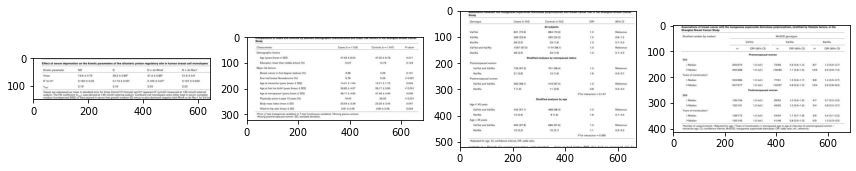

In [3]:
# load data
%matplotlib inline
import matplotlib.pyplot as plt 
import glob
from tqdm import tqdm
from PIL import Image

fig, axs = plt.subplots(1, 4, figsize=(12, 12))
i = 0
for image_path in tqdm(
        glob.glob("data/pubtables1m/PubTables1M-Structure-PASCAL-VOC/images/*.jpg")[:4],
        total=4,
    ):
    image = Image.open(image_path).convert("RGB")
    axs[i].imshow(image)
    i += 1
plt.tight_layout()

# 3. Init model

In [2]:
from core import TableRecognizer

In [3]:
import sys
sys.argv=['']
del sys

In [4]:
# init model
m = TableRecognizer(checkpoint_path="output/pubtables1m_structure_detr_r18.pth")

{'lr': 5e-05, 'lr_backbone': 1e-05, 'batch_size': 2, 'weight_decay': 0.0001, 'epochs': 20, 'lr_drop': 1, 'lr_gamma': 0.9, 'clip_max_norm': 0.1, 'backbone': 'resnet18', 'num_classes': 6, 'dilation': False, 'position_embedding': 'sine', 'emphasized_weights': {}, 'enc_layers': 6, 'dec_layers': 6, 'dim_feedforward': 2048, 'hidden_dim': 256, 'dropout': 0.1, 'nheads': 8, 'num_queries': 125, 'pre_norm': True, 'masks': False, 'aux_loss': False, 'mask_loss_coef': 1, 'dice_loss_coef': 1, 'ce_loss_coef': 1, 'bbox_loss_coef': 5, 'giou_loss_coef': 2, 'eos_coef': 0.4, 'set_cost_class': 1, 'set_cost_bbox': 5, 'set_cost_giou': 2, 'device': 'cuda', 'seed': 42, 'start_epoch': 0, 'num_workers': 1, '__module__': 'core', '__dict__': <attribute '__dict__' of 'Args' objects>, '__weakref__': <attribute '__weakref__' of 'Args' objects>, '__doc__': None}
<class 'core.Args'>
----------------------------------------------------------------------------------------------------
loading model
loading model from check

# 4. Infer images

In [5]:
# infer an image
output = m.predict("data/pubtables1m/PubTables1M-Structure-PASCAL-VOC/images/PMC1064076_table_2.jpg", thresh=0.97)

{'scores': tensor([9.8713e-01, 2.6960e-02, 3.6900e-03, 1.3113e-02, 9.5266e-04, 3.3135e-02,
        9.9907e-01, 9.9762e-01, 2.6337e-05, 6.0300e-02, 9.9857e-01, 9.9695e-01,
        5.2670e-03, 9.9996e-01, 9.9823e-01, 3.5738e-02, 9.7794e-03, 9.9643e-01,
        1.1346e-03, 9.9812e-01, 9.2873e-04, 5.7055e-03, 1.5356e-02, 9.2459e-03,
        9.9985e-01, 1.6307e-01, 2.6246e-02, 9.9994e-01, 3.3557e-02, 2.1195e-02,
        9.9993e-01, 1.4661e-02, 2.9620e-03, 1.4741e-02, 9.7959e-01, 9.9996e-01,
        2.1197e-01, 2.1104e-03, 6.7126e-02, 9.8836e-01, 4.1630e-03, 4.9073e-02,
        9.8811e-01, 7.3124e-03, 3.8621e-02, 9.9835e-01, 1.0543e-01, 6.8247e-04,
        2.7121e-04, 2.6872e-02, 9.9818e-01, 1.0312e-02, 1.7419e-02, 3.3245e-03,
        8.1825e-03, 1.3041e-01, 4.5923e-03, 1.8664e-01, 9.9940e-01, 3.2524e-03,
        9.9924e-01, 5.1021e-03, 4.0186e-02, 2.1538e-01, 5.6557e-03, 1.2650e-01,
        9.9964e-01, 2.2569e-03, 9.9974e-01, 2.4802e-02, 3.0819e-02, 6.2488e-02,
        1.7108e-03, 6.5471e-0

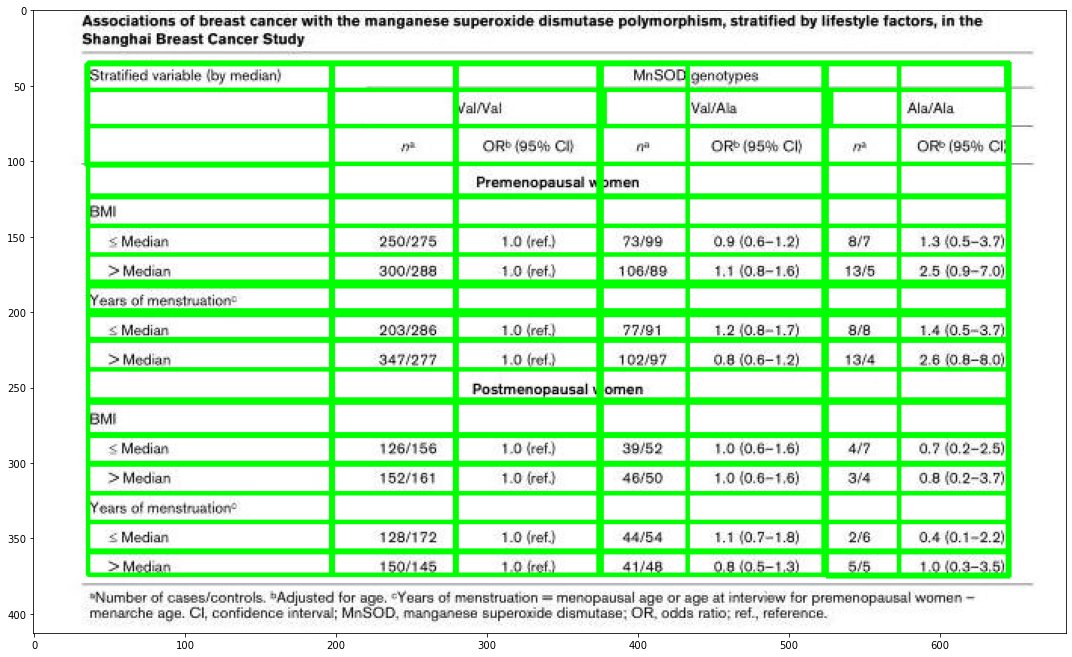

In [6]:
# plot the inference
%matplotlib inline
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(output["debug_image"])
plt.tight_layout()

In [10]:
# infer multiple images
import glob
from tqdm import tqdm

outputs = [] # [..., [..., [x_min, y_min, x_max, y_max], ...], ...]
for image_path in tqdm(
        glob.glob("data/pubtables1m/PubTables1M-Structure-PASCAL-VOC/images/*.jpg")[:4],
        total=4,
    ):
    output = m.predict(image_path) 
    outputs.append(output["boxes"])

 25%|█████████████████████                                                               | 1/4 [00:00<00:00,  3.42it/s]

{'scores': tensor([5.6610e-06, 2.0122e-05, 1.8658e-06, 1.5890e-05, 3.9756e-06, 3.2136e-06,
        9.9991e-01, 2.9108e-05, 2.3638e-06, 5.8043e-06, 9.8117e-07, 6.1941e-06,
        1.0173e-06, 9.9998e-01, 5.1838e-05, 1.0699e-05, 2.1923e-05, 4.5669e-06,
        9.5107e-05, 2.4064e-06, 7.8033e-08, 1.6508e-05, 1.3748e-06, 5.8038e-06,
        5.5947e-05, 1.2184e-06, 1.7986e-05, 1.5836e-06, 8.9532e-06, 1.0903e-05,
        9.9964e-01, 2.0959e-06, 2.3094e-06, 3.9285e-06, 1.4106e-06, 9.9991e-01,
        4.0784e-06, 4.5866e-06, 3.9644e-06, 3.5318e-06, 3.6442e-06, 8.5501e-06,
        5.3937e-07, 1.6999e-05, 1.9906e-06, 9.3017e-06, 2.4913e-06, 2.7552e-05,
        5.9701e-05, 1.0725e-05, 4.1931e-06, 3.6394e-05, 1.4419e-05, 3.3769e-05,
        6.5546e-07, 6.5311e-06, 4.7049e-06, 7.9780e-07, 2.6273e-05, 1.0480e-05,
        1.6199e-05, 2.2982e-06, 6.6851e-07, 1.4257e-06, 5.5578e-06, 3.8219e-06,
        9.9969e-01, 2.2463e-05, 9.9994e-01, 5.1743e-06, 1.4145e-05, 3.0542e-06,
        1.2008e-05, 1.2204e-0

 50%|██████████████████████████████████████████                                          | 2/4 [00:00<00:00,  3.63it/s]

{'scores': tensor([9.9995e-01, 2.0999e-05, 1.1468e-05, 1.3090e-05, 5.5751e-06, 5.4202e-05,
        9.9981e-01, 8.7385e-05, 1.4745e-04, 5.3013e-05, 9.9984e-01, 1.0223e-05,
        6.2731e-06, 9.9996e-01, 7.5562e-05, 5.4310e-05, 5.3003e-05, 1.1434e-04,
        1.3318e-03, 9.9950e-01, 4.7803e-05, 1.3730e-04, 2.6990e-05, 5.1434e-04,
        3.3002e-04, 1.9304e-05, 3.6415e-05, 9.9987e-01, 8.3776e-06, 1.5095e-04,
        9.9952e-01, 1.0265e-05, 7.6586e-06, 1.2306e-04, 9.9955e-01, 9.9995e-01,
        2.6841e-05, 4.7763e-05, 3.3320e-05, 9.9980e-01, 3.5187e-05, 3.0805e-05,
        9.9692e-01, 2.5816e-04, 8.7607e-06, 9.9984e-01, 2.8645e-05, 8.0267e-06,
        1.0682e-05, 2.5294e-06, 2.1249e-05, 6.6713e-05, 3.3006e-05, 2.9414e-04,
        1.5262e-05, 3.1343e-06, 6.0596e-05, 2.0658e-06, 2.4987e-05, 1.9250e-05,
        9.6376e-05, 6.0072e-03, 9.1300e-06, 3.3599e-06, 5.1092e-06, 2.0683e-05,
        9.9978e-01, 1.1110e-04, 9.9990e-01, 9.9300e-06, 6.0382e-05, 6.6422e-06,
        1.9665e-05, 1.6282e-0

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.59it/s]

{'scores': tensor([9.8713e-01, 2.6960e-02, 3.6900e-03, 1.3113e-02, 9.5266e-04, 3.3135e-02,
        9.9907e-01, 9.9762e-01, 2.6337e-05, 6.0300e-02, 9.9857e-01, 9.9695e-01,
        5.2670e-03, 9.9996e-01, 9.9823e-01, 3.5738e-02, 9.7794e-03, 9.9643e-01,
        1.1346e-03, 9.9812e-01, 9.2873e-04, 5.7055e-03, 1.5356e-02, 9.2459e-03,
        9.9985e-01, 1.6307e-01, 2.6246e-02, 9.9994e-01, 3.3557e-02, 2.1195e-02,
        9.9993e-01, 1.4661e-02, 2.9620e-03, 1.4741e-02, 9.7959e-01, 9.9996e-01,
        2.1197e-01, 2.1104e-03, 6.7126e-02, 9.8836e-01, 4.1630e-03, 4.9073e-02,
        9.8811e-01, 7.3124e-03, 3.8621e-02, 9.9835e-01, 1.0543e-01, 6.8247e-04,
        2.7121e-04, 2.6872e-02, 9.9818e-01, 1.0312e-02, 1.7419e-02, 3.3245e-03,
        8.1825e-03, 1.3041e-01, 4.5923e-03, 1.8664e-01, 9.9940e-01, 3.2524e-03,
        9.9924e-01, 5.1021e-03, 4.0186e-02, 2.1538e-01, 5.6557e-03, 1.2650e-01,
        9.9964e-01, 2.2569e-03, 9.9974e-01, 2.4802e-02, 3.0819e-02, 6.2488e-02,
        1.7108e-03, 6.5471e-0

# 5. Evaluate model

In [12]:
# evaluate model on pubtables-1m-structure
import os
import argparse
import json
from datetime import datetime
import sys
import random
import numpy as np
import torch
from torch.utils.data import DataLoader
from src.main import *
sys.path.append("../detr")
from engine import evaluate, train_one_epoch
from models import build_model
import util.misc as utils
import datasets.transforms as R

cmd_args = {
    "data_root_dir": "data/pubtables1m/PubTables1M-Structure-PASCAL-VOC",
    "config_file": "src/structure_config.json",
    "backbone": "resnet18",
    "data_type": "structure",
    "model_load_path": "output/pubtables1m_structure_detr_r18.pth",
    "metrics_save_filepath": "",
    "table_words_dir": "",
    "mode": "eval",
    "debug": True,
    "test_max_size": 500
}
config_args = json.load(open(cmd_args["config_file"], "rb"))
config_args.update(cmd_args)
args = type("Args", (object,), config_args)
print(args.__dict__)
print("-" * 100)

# fix the seed for reproducibility
seed = args.seed + utils.get_rank()
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

print("loading model")
device = torch.device(args.device)
model, criterion, postprocessors = get_model(args, device)

if args.mode == "train":
    train(args, model, criterion, postprocessors, device)
elif args.mode == "eval":
    eval(args, model, criterion, postprocessors, device)
elif args.mode == "grits":
    assert (
        args.data_type == "structure"
    ), "GriTS is only applicable to structure recognition"
    dataset_test = get_data(args)
    grits(args, model, dataset_test, device)

{'lr': 5e-05, 'lr_backbone': 1e-05, 'batch_size': 2, 'weight_decay': 0.0001, 'epochs': 20, 'lr_drop': 1, 'lr_gamma': 0.9, 'clip_max_norm': 0.1, 'backbone': 'resnet18', 'num_classes': 6, 'dilation': False, 'position_embedding': 'sine', 'emphasized_weights': {}, 'enc_layers': 6, 'dec_layers': 6, 'dim_feedforward': 2048, 'hidden_dim': 256, 'dropout': 0.1, 'nheads': 8, 'num_queries': 125, 'pre_norm': True, 'masks': False, 'aux_loss': False, 'mask_loss_coef': 1, 'dice_loss_coef': 1, 'ce_loss_coef': 1, 'bbox_loss_coef': 5, 'giou_loss_coef': 2, 'eos_coef': 0.4, 'set_cost_class': 1, 'set_cost_bbox': 5, 'set_cost_giou': 2, 'device': 'cuda', 'seed': 42, 'start_epoch': 0, 'num_workers': 1, 'data_root_dir': 'data/pubtables1m/PubTables1M-Structure-PASCAL-VOC', 'config_file': 'src/structure_config.json', 'data_type': 'structure', 'model_load_path': 'output/pubtables1m_structure_detr_r18.pth', 'metrics_save_filepath': '', 'table_words_dir': '', 'mode': 'eval', 'debug': True, 'test_max_size': 500, '__